In [94]:
# import the neccessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Data Exploration and Cleaning
- Data Collection
- Data Exploration
- Data Cleaning

In [95]:
# load the data or file path
sales = pd.read_csv("/content/train.csv")
sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [96]:
sales.shape

(9800, 18)

In [97]:
# check the columns that have missing value or null
sales.columns.value_counts().sum()

np.int64(18)

In [98]:
# check the description of the data
sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [99]:
#check the head
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [100]:
# check the tails
sales.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [101]:
# check the for duplicate value or rows
sales.duplicated().sum()

np.int64(0)

In [102]:
# check or observe the columns
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [103]:
# row id column
sales["Row ID"].isnull().sum()

np.int64(0)

In [104]:
# Order ID
sales["Order ID"].isnull().sum()

np.int64(0)

In [105]:
# Order Date
sales["Order Date"].isnull().sum()

np.int64(0)

In [106]:
# Ship Date
sales["Ship Date"].isnull().sum()

np.int64(0)

In [107]:
# Ship Mode
sales["Ship Mode"].isnull().sum()

np.int64(0)

In [108]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [109]:
# Customer ID
sales["Customer ID"].isnull().sum()

np.int64(0)

In [110]:
# Customer Name
sales["Customer Name"].isnull().sum()

np.int64(0)

In [111]:
# Segment
sales["Segment"].isnull().sum()

np.int64(0)

In [112]:
# Country
sales["Country"].isnull().sum()

np.int64(0)

In [113]:
# City
sales["City"].isnull().sum()

np.int64(0)

In [114]:
# State
sales["State"].isnull().sum()

np.int64(0)

In [115]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [116]:
# Postal Code
sales["Postal Code"].isnull().sum()

np.int64(11)

In [117]:
# check the value counts
sales["Postal Code"].value_counts()

,count
Postal Code,
10035.0,253
10024.0,225
10009.0,220
94122.0,195
10011.0,193
...,...
93405.0,1
8401.0,1
60067.0,1


In [118]:
# replace the missing values
sales.fillna({"Postal Code": 10009.0 }, inplace=True)

In [119]:
# call the column to check if the misssing value have been replace
sales["Postal Code"]

,Postal Code
0,42420.0
1,42420.0
2,90036.0
3,33311.0
4,33311.0
...,...
9795,60610.0
9796,43615.0
9797,43615.0
9798,43615.0


In [120]:
# Region
sales["Region"].isnull().sum()

np.int64(0)

In [121]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [122]:
# Product ID'
sales["Product ID"].isnull().sum()

np.int64(0)

In [123]:
# Category
sales["Category"].isnull().sum()

np.int64(0)

In [124]:
# Sub-Category
sales["Sub-Category"].isnull().sum()

np.int64(0)

In [125]:
# Product Name
sales["Product Name"].isnull().sum()

np.int64(0)

In [126]:
# Sales
sales["Sales"].isnull().sum()

np.int64(0)

# 2. Exploratory Data Analysis
- a. Count of sub-category
- b. Best Performing Category
- c. Which customer segment is the most profitable?
- d. Which is the preferred Ship Mode?
- e. Customer Regional Analysis

In [127]:
# Count of sub-category
print("Below the count of Subcategory")
sales["Sub-Category"].value_counts()

Below the count of Subcategory


,count
Sub-Category,
Binders,1492
Paper,1338
Furnishings,931
Phones,876
Storage,832
Art,785
Accessories,756
Chairs,607
Appliances,459


In [128]:
# Best Performing Category

print("Below is the best performing category")
sales["Category"].value_counts()

Below is the best performing category


,count
Category,
Office Supplies,5909
Furniture,2078
Technology,1813


In [129]:
# Which customer segment is the most profitable?

most_profitable_segment = sales.groupby('Segment')['Sales'].sum().idxmax()
print(f"The most profitable customer segment is: {most_profitable_segment}")

The most profitable customer segment is: Consumer


In [130]:
# Which is the preferred Ship Mode?

preferred_ship_mode = sales['Ship Mode'].value_counts().idxmax()
print(f"The preferred ship mode is: {preferred_ship_mode}")


The preferred ship mode is: Standard Class


Customer Regional Sales:
Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


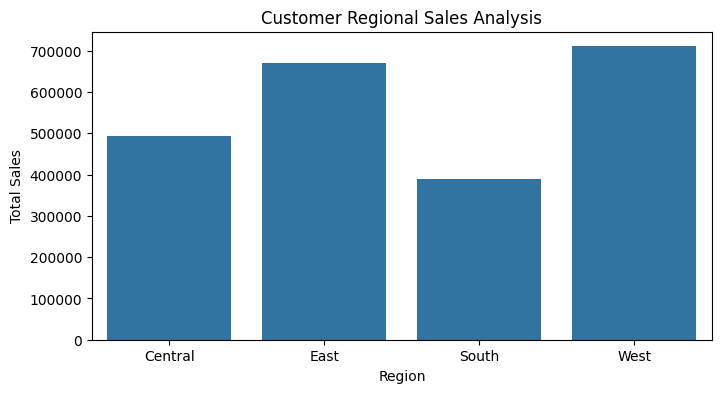

In [131]:
# Customer Regional Analysis
customer_regional_sales = sales.groupby('Region')['Sales'].sum()
print("Customer Regional Sales:")
print(customer_regional_sales)

# Visualization:
plt.figure(figsize=(8, 4))
sns.barplot(x=customer_regional_sales.index, y=customer_regional_sales.values)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Customer Regional Sales Analysis")
plt.show()


# Conclusion
- this is the end of the projects